In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# **Read CSV & store it in Dataframe**

In [2]:
df = pd.read_csv('H2HBABBA1361.csv')

# **Shape of the Dataframe**

In [3]:
df.shape

(50000, 19)

# **Display First 5 Rows of Dataframe**

In [4]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200040366,RASTEL co,2019-05-17 00:00:00,2019.0,1.929212e+09,2019-05-01,20190426,20190501,20190516.0,USD,RV,1.0,NaN,2160.31,20190501.0,NAA8,1.929212e+09,0
1,U001,0200707822,PUBLI us,2019-09-18 00:00:00,2019.0,1.929821e+09,2019-09-03,20190903,20190903,20190918.0,USD,RV,1.0,NaN,111586.61,20190903.0,NAA8,1.929821e+09,0
2,CA02,0140104409,LOB co,2019-11-22 00:00:00,2019.0,2.960593e+09,2019-11-11,20191111,20191111,20191121.0,CAD,RV,1.0,NaN,65153.44,20191111.0,CA10,2.960593e+09,0
3,U001,200390794,CASH-W corporation,NaN,2020.0,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,USD,RV,1.0,NaN,21634.82,20200506.0,NAA8,1.930867e+09,1
4,U001,0200418007,AM corporation,NaN,2020.0,1.930805e+09,2020-04-22,20200420,20200422,20200626.0,USD,RV,1.0,NaN,31.56,20200422.0,NAGD,1.930805e+09,1


# **Display Last 5 Rows of Dataframe**

In [5]:
df.tail(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200875006,KROGER associates,2019-04-26 00:00:00,2019.0,1.929136e+09,2019-04-11,20190412,20190411,20190426.0,USD,RV,1.0,NaN,184407.56,20190411.0,NAA8,1.929136e+09,0
49996,U001,0200769623,WAL-MAR foundation,2019-11-04 00:00:00,2019.0,1.930037e+09,2019-10-24,20191021,20191024,20191108.0,USD,RV,1.0,NaN,16175.40,20191024.0,NAH4,1.930037e+09,0
49997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930802e+09,2020-04-21,20200420,20200421,20200506.0,USD,RV,1.0,NaN,54791.03,20200421.0,NAH4,1.930802e+09,1
49998,U001,0200759878,SA co,2019-03-11 00:00:00,2019.0,1.928845e+09,2019-02-23,20190222,20190223,20190310.0,USD,RV,1.0,NaN,73799.96,20190223.0,NAH4,1.928845e+09,0
49999,U001,0200865666,RESTAU corp,2019-03-20 00:00:00,2019.0,1.928907e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,11895.36,20190305.0,NAA8,1.928907e+09,0


# **Statistics**

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999500e+04,50000.000000
mean,2019.304320,2.008873e+09,2.019350e+07,2.019353e+07,2.019367e+07,1.0,NaN,3.243631e+04,2.019353e+07,2.008124e+09,0.200000
std,0.460123,2.816167e+08,4.491489e+03,4.477061e+03,4.463724e+03,0.0,NaN,4.026165e+04,4.478179e+03,2.714829e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018032e+07,1.0,NaN,2.700000e-01,2.018031e+07,1.928502e+09,0.000000
25%,2019.000000,1.929341e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.871745e+03,2.019051e+07,1.929341e+09,0.000000
50%,2019.000000,1.929974e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,1.763928e+04,2.019091e+07,1.929974e+09,0.000000
75%,2020.000000,1.930617e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.704053e+04,2.020013e+07,1.930617e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.501474e+06,2.020052e+07,2.960636e+09,1.000000


# **Checking for Non-Null Values**

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# **Number of NULL Values**

In [8]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

# **Dropping columns with ALL NULL values**

In [9]:
df.dropna(how='all', axis=1, inplace=True)

In [10]:
df.shape
#Dropped area_business

(50000, 18)

# **Drop the Rows who have invoice_id as NULL**

In [11]:
df.dropna(subset=['invoice_id'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [13]:
df["isOpen"].value_counts()

0    39995
1    10000
Name: isOpen, dtype: int64

# **Checking for Unique Values in Each Column**

In [14]:
n = df.nunique(axis=0)
print(n)

business_code                 6
cust_number                1431
name_customer              4190
clear_date                  400
buisness_year                 2
doc_id                    48760
posting_date                502
document_create_date        505
document_create_date.1      502
due_in_date                 550
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44252
baseline_create_date        507
cust_payment_terms           70
invoice_id                48760
isOpen                        2
dtype: int64


# **As there is only 1 unique value in document type and posting_id so we can drop these**

In [15]:
df.drop(['document type', 'posting_id'], axis = 1, inplace=True)

In [16]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Searching for Duplicate Columns**

In [17]:
duplicate = []
for i in range (df.shape[1]):
    col = df.iloc[:,i]
    for j in range (i+1, df.shape[1]):
        othercol = df.iloc[:,j]
        if(col.equals(othercol)):
            duplicate.append(df.columns[i]);
            print("Duplicate with : "+df.columns[j])
print(duplicate)

Duplicate with : invoice_id
['doc_id']


In [18]:
df.drop(duplicate, axis = 1, inplace=True) 

In [19]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Date-Time Conversion**

In [20]:
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date'].head(5)

0   2019-04-26
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-20
Name: document_create_date, dtype: datetime64[ns]

In [21]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head(5)

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: document_create_date.1, dtype: datetime64[ns]

In [22]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2019-05-16
1   2019-09-18
2   2019-11-21
3   2020-05-21
4   2020-06-26
Name: due_in_date, dtype: datetime64[ns]

In [23]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: baseline_create_date, dtype: datetime64[ns]

In [24]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2019-05-17
1   2019-09-18
2   2019-11-22
3          NaT
4          NaT
Name: clear_date, dtype: datetime64[ns]

In [25]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: posting_date, dtype: datetime64[ns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49995 non-null  object        
 1   cust_number             49995 non-null  object        
 2   name_customer           49995 non-null  object        
 3   clear_date              39995 non-null  datetime64[ns]
 4   buisness_year           49995 non-null  float64       
 5   posting_date            49995 non-null  datetime64[ns]
 6   document_create_date    49995 non-null  datetime64[ns]
 7   document_create_date.1  49995 non-null  datetime64[ns]
 8   due_in_date             49995 non-null  datetime64[ns]
 9   invoice_currency        49995 non-null  object        
 10  total_open_amount       49995 non-null  float64       
 11  baseline_create_date    49995 non-null  datetime64[ns]
 12  cust_payment_terms      49995 non-null  object

# **Again Checking for Duplicate Columns** 

In [27]:
duplicate = []
for x in range (df.shape[1]):
    col = df.iloc[:,x]
    for y in range (x+1, df.shape[1]):
        othercol = df.iloc[:,y]
        if(col.equals(othercol)):
            duplicate.append(df.columns[x]);
            print("Duplicate with : "+df.columns[y])
print(duplicate)

Duplicate with : document_create_date.1
['posting_date']


In [28]:
df.drop(duplicate, axis = 1, inplace=True) 

In [29]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Between document_create_date & document_create_date.1, we can drop one of them**

In [30]:
# Due to Quasi-constant we can drop one of them
df.drop(columns=['document_create_date'],inplace=True)

# **Invoice Id is unique for each transaction and don't affect the sales, so we drop it**

In [31]:
#df.drop(columns=['invoice_id'],inplace=True)

In [32]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,1.929212e+09,0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,1.929821e+09,0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,2.960593e+09,0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1.930867e+09,1
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1.930805e+09,1


# **Dropping the Duplicate Rows**

In [33]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,1.929212e+09,0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,1.929821e+09,0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,2.960593e+09,0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1.930867e+09,1
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1.930805e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48755,U001,0200875006,KROGER associates,2019-04-26,2019.0,2019-04-11,2019-04-26,USD,184407.56,2019-04-11,NAA8,1.929136e+09,0
48756,U001,0200769623,WAL-MAR foundation,2019-11-04,2019.0,2019-10-24,2019-11-08,USD,16175.40,2019-10-24,NAH4,1.930037e+09,0
48757,U001,0200769623,WAL-MAR llc,NaT,2020.0,2020-04-21,2020-05-06,USD,54791.03,2020-04-21,NAH4,1.930802e+09,1
48758,U001,0200759878,SA co,2019-03-11,2019.0,2019-02-23,2019-03-10,USD,73799.96,2019-02-23,NAH4,1.928845e+09,0


# **Target Variable**
# *Our Model can't Predict Dates so target column will not be clear_date.*
# *We will add delay column as target column where delay = due_in_date - clear_date*

In [34]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [35]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,1.929212e+09,0,1.0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,1.929821e+09,0,0.0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,2.960593e+09,0,1.0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1.930867e+09,1,NaN
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1.930805e+09,1,NaN


# **Sorting with respect to document_create_date.1**

In [36]:
#So that future date will not be included in Train Dataset
df.sort_values(by='document_create_date.1',inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,11582.37,2018-12-30,NAH4,1.928539e+09,0,-5.0
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,65968.36,2018-12-30,NAH4,1.928536e+09,0,-5.0
2,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,985.41,2018-12-30,NAH4,1.928537e+09,0,-5.0
3,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,131.10,2018-12-30,NAA8,1.928542e+09,0,1.0
4,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,2116.89,2018-12-30,NAH4,1.928544e+09,0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48755,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,8064.00,2020-05-13,NA10,1.930900e+09,1,NaN
48756,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1.930907e+09,1,NaN
48757,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1.930917e+09,1,NaN
48758,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,2.960636e+09,1,NaN


# **Splitting - Creating test set on NULL clear_date**

In [38]:
testData = df[df.clear_date.isnull()].reset_index()
testData.drop(columns=['index'], inplace=True)
testData

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,63313.93,2020-02-27,NAH4,1.930574e+09,1,NaN
1,U001,0200763814,SYSCO F systems,NaT,2020.0,2020-02-27,2020-03-30,USD,49884.00,2020-02-27,NA32,1.930579e+09,1,NaN
2,U001,0200761734,H E BUT in,NaT,2020.0,2020-02-27,2020-03-13,USD,94461.58,2020-02-27,NAA8,1.930576e+09,1,NaN
3,U001,0200759878,SA systems,NaT,2020.0,2020-02-27,2020-03-13,USD,35147.50,2020-02-27,NAH4,1.930569e+09,1,NaN
4,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,24145.01,2020-02-27,NAC6,1.930572e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,8064.00,2020-05-13,NA10,1.930900e+09,1,NaN
9681,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1.930907e+09,1,NaN
9682,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1.930917e+09,1,NaN
9683,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,2.960636e+09,1,NaN


# **X_Test**

In [39]:
x_test = testData.iloc[:,0:13]
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,63313.93,2020-02-27,NAH4,1.930574e+09,1
1,U001,0200763814,SYSCO F systems,NaT,2020.0,2020-02-27,2020-03-30,USD,49884.00,2020-02-27,NA32,1.930579e+09,1
2,U001,0200761734,H E BUT in,NaT,2020.0,2020-02-27,2020-03-13,USD,94461.58,2020-02-27,NAA8,1.930576e+09,1
3,U001,0200759878,SA systems,NaT,2020.0,2020-02-27,2020-03-13,USD,35147.50,2020-02-27,NAH4,1.930569e+09,1
4,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,24145.01,2020-02-27,NAC6,1.930572e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,8064.00,2020-05-13,NA10,1.930900e+09,1
9681,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1.930907e+09,1
9682,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1.930917e+09,1
9683,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,2.960636e+09,1


# **Y_Test**

In [40]:
y_test = testData.iloc[:,-1]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9680   NaN
9681   NaN
9682   NaN
9683   NaN
9684   NaN
Name: delay, Length: 9685, dtype: float64

# **Creating Train Set**

In [41]:
trainData = df[df.clear_date.notnull()].reset_index()
trainData.drop(columns=['index'], inplace=True)
trainData

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,11582.37,2018-12-30,NAH4,1.928539e+09,0,-5.0
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,65968.36,2018-12-30,NAH4,1.928536e+09,0,-5.0
2,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,985.41,2018-12-30,NAH4,1.928537e+09,0,-5.0
3,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,131.10,2018-12-30,NAA8,1.928542e+09,0,1.0
4,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,2116.89,2018-12-30,NAH4,1.928544e+09,0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39070,CA02,0140104392,FLANAG systems,2020-03-10,2020.0,2020-02-27,2020-03-09,CAD,58200.54,2020-02-28,CA10,2.960618e+09,0,1.0
39071,U001,0200739534,OK,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,29964.80,2020-02-27,NAA8,1.930580e+09,0,0.0
39072,U001,0200290370,BARGAIN corp,2020-03-16,2020.0,2020-02-27,2020-03-13,USD,3599.97,2020-02-27,NAA8,1.930577e+09,0,3.0
39073,U001,0200700919,US co,2020-03-20,2020.0,2020-02-27,2020-03-18,USD,90195.02,2020-02-27,NAD1,1.930580e+09,0,2.0


# **Main_Train --> (Train, Validation)**
## Train - For Model Training
## Validation - For Model Tuning

In [42]:
X = trainData.drop(columns = ['delay'])
Y = trainData['delay']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.8)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((31260, 13), (31260,), (7815, 13), (7815,))

# **EDA**

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31260 entries, 14563 to 2380
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31260 non-null  object        
 1   cust_number             31260 non-null  object        
 2   name_customer           31260 non-null  object        
 3   clear_date              31260 non-null  datetime64[ns]
 4   buisness_year           31260 non-null  float64       
 5   document_create_date.1  31260 non-null  datetime64[ns]
 6   due_in_date             31260 non-null  datetime64[ns]
 7   invoice_currency        31260 non-null  object        
 8   total_open_amount       31260 non-null  float64       
 9   baseline_create_date    31260 non-null  datetime64[ns]
 10  cust_payment_terms      31260 non-null  object        
 11  invoice_id              31260 non-null  float64       
 12  isOpen                  31260 non-null  int

## **business_code**
Business Code

In [44]:
X_train['business_code'].value_counts()

U001    28360
CA02     2389
U013      402
U002      100
U005        8
U007        1
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

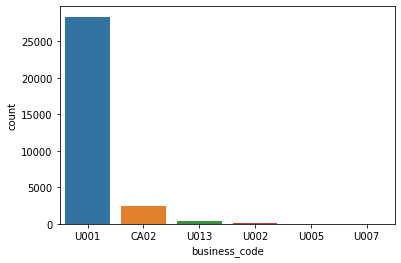

In [45]:
sns.countplot(x = X_train['business_code'])

## **cust_number**
Customer Number given to all the customers

In [46]:
X_train['cust_number'].value_counts()

0200769623    6921
0200726979    1157
0200762301     889
0200759878     843
0200794332     685
              ... 
200770567        1
200702946        1
0200612379       1
200749782        1
0100053926       1
Name: cust_number, Length: 1244, dtype: int64

## **name_customer**
Name of the Customer.

In [47]:
X_train['name_customer'].value_counts()

WAL-MAR co            718
WAL-MAR trust         708
WAL-MAR associates    687
WAL-MAR               676
WAL-MAR systems       673
                     ... 
PECAN us                1
CORPOR foundation       1
APPE us                 1
DEF. F llc              1
DAIRY co                1
Name: name_customer, Length: 3546, dtype: int64

## **clear_date**
The date on which the customer make the full payment.

In [48]:
X_train['clear_date'].min()

Timestamp('2019-01-03 00:00:00')

In [49]:
X_train['clear_date'].max()

Timestamp('2020-05-21 00:00:00')

In [50]:
diff = (X_train['clear_date'].max() - X_train['clear_date'].min());
print("clear_date ranges between : "+str(diff))

clear_date ranges between : 504 days 00:00:00


In [51]:
#clear_month
clear_month = X_train['clear_date'].dt.month
clear_month.value_counts()

2     3711
3     3151
5     2706
4     2645
11    2592
12    2568
10    2432
8     2402
7     2388
9     2283
1     2205
6     2177
Name: clear_date, dtype: int64

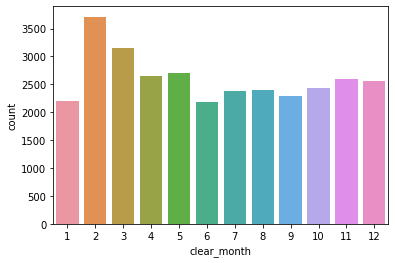

In [52]:
ax = sns.countplot(x = clear_month)
ax.set(xlabel='clear_month', ylabel='count')
plt.show()

# **business_year**
Indicates the year of Clear Date

In [53]:
X_train['buisness_year'].value_counts()

2019.0    27201
2020.0     4059
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='buisness_year', ylabel='count'>

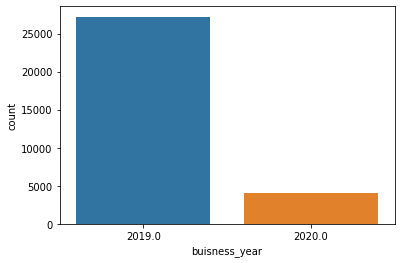

In [54]:
sns.countplot(x = X_train['buisness_year'])

# **document_create_date.1**
The date on which the invoice document was created

In [55]:
X_train["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [56]:
X_train["document_create_date.1"].max()

Timestamp('2020-02-27 00:00:00')

In [57]:
diff = X_train["document_create_date.1"].max() - X_train["document_create_date.1"].min()
diff

Timedelta('424 days 00:00:00')

# **due_in_date**
The last date for payment

In [58]:
X_train['due_in_date'].min()

Timestamp('2018-03-18 00:00:00')

In [59]:
X_train['due_in_date'].max()

Timestamp('2020-06-24 00:00:00')

In [60]:
diff = (X_train['due_in_date'].max() - X_train['due_in_date'].min());
diff

Timedelta('829 days 00:00:00')

In [61]:
due_month = X_train['due_in_date'].dt.month
due_month.value_counts()

2     3851
3     3201
5     2628
11    2610
4     2578
10    2453
7     2353
8     2348
12    2334
6     2328
1     2295
9     2281
Name: due_in_date, dtype: int64

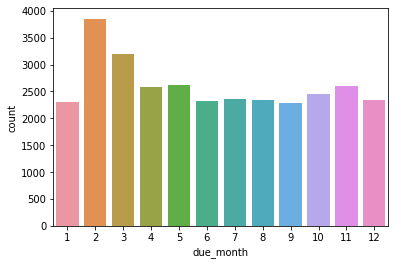

In [62]:
ax = sns.countplot(x = due_month)
ax.set(xlabel='due_month', ylabel='count')
plt.show()

# **invoice_currency**

In [63]:
X_train["invoice_currency"].value_counts()

USD    28871
CAD     2389
Name: invoice_currency, dtype: int64

As there are two currencies, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

# **total_open_amount**

The amount that is to be paid for that invoice

In [64]:
X_train['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count      31260.000000
mean       32166.230767
std        40659.206834
min            0.790000
25%         4645.652500
50%        17251.750000
75%        46300.900000
max      1501474.160000
Name: total_open_amount, dtype: object

# **baseline_create_date**
The date on which the Invoice was created.

In [65]:
count=0
count1=0
for row in range (trainData.shape[0]):
    if(trainData['document_create_date.1'][row] == trainData['baseline_create_date'][row]):
        count = count + 1;
    else:
        count1 = count1 + 1;
print("Number of Similar Dates : "+str(count))
print("Number of Non-Similar Dates : "+str(count1))

Number of Similar Dates : 34781
Number of Non-Similar Dates : 4294


Baseline create date and document create date are same except if the company is Canadian.
It's not that important to our model so we'll drop it

# **cust_payment_terms**

In [66]:
X_train['cust_payment_terms'].value_counts()

NAA8    12590
NAH4     8247
CA10     2328
NAC6     1029
NAM4      847
        ...  
NA8Q        1
NAUW        1
NA25        1
NAV9        1
NACE        1
Name: cust_payment_terms, Length: 63, dtype: int64

# **isOpen**
Tells whether a transaction is open or closed

In [67]:
X_train.isOpen.value_counts()

0    31260
Name: isOpen, dtype: int64

# **Delay**
The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have replace the negative values with 0

In [68]:
count=0
for row in range(trainData.shape[0]):
    if (trainData['delay'][row] < 0):
        count = count + 1
print(count)

14334


In [69]:
trainData['delay'] = trainData.delay.apply(lambda x: 0 if x<0 else x)
Y_train=Y_train.apply(lambda x: 0 if x<0 else x)
y_test=y_test.apply(lambda x: 0 if x<0 else x)
Y_valid=Y_valid.apply(lambda x: 0 if x<0 else x)

In [70]:
count=0
for row in range(trainData.shape[0]):
    if (trainData['delay'][row] < 0):
        count = count + 1
print(count)

0


In [71]:
trainData.delay.describe()

count    39075.000000
mean         2.701830
std          9.279582
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        442.000000
Name: delay, dtype: float64

<AxesSubplot:xlabel='delay', ylabel='Density'>

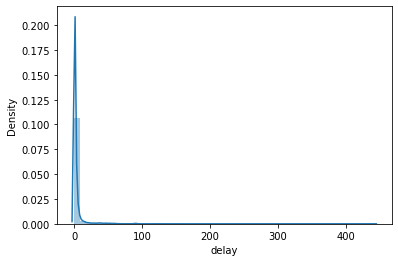

In [72]:
sns.distplot(Y_train)

# **Multivariate Analysis**
### **Relation b/w business_code with invoice_currency**

In [73]:
trainData['invoice_currency'].value_counts()

USD    36057
CAD     3018
Name: invoice_currency, dtype: int64

In [74]:
trainData.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              3018
USD               U001             35442
                  U013               490
                  U002               114
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

## **Delay Bin**

In [75]:
delay_bins = [0,15,30,45,60]
delay_bucket = pd.cut(Y_train, bins = delay_bins)

## **Amount Bin**

In [76]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(X_train['total_open_amount'], bins = amount_bins)

In [77]:
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]"
total_open_amount,,,,
"(0, 5000]",2691,87,81,75
"(5000, 10000]",1222,58,46,26
"(10000, 50000]",5008,244,167,105
"(50000, 100000]",2038,48,17,8
"(100000, 1100000]",934,14,10,6


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

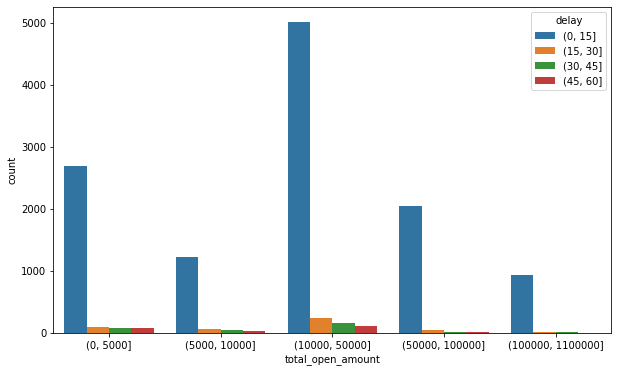

In [78]:
plt.figure(figsize=(10,6))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

In [79]:
#sns.pairplot(X_train.merge(Y_train, on=X_train.index))

# **Feature Engineering**

In [80]:
X_train.drop(columns=[ 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)
X_valid.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)
x_test.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)

In [81]:
X_train.shape, X_valid.shape, x_test.shape

((31260, 8), (7815, 8), (9685, 8))

In [82]:
X_train['cust_num'] = X_train['cust_number'].str.extract('(\d+)')
x_test['cust_num'] = x_test['cust_number'].str.extract('(\d+)')
X_valid['cust_num'] = X_valid['cust_number'].str.extract('(\d+)')
X_train.drop('cust_number',axis=1,inplace=True)
x_test.drop('cust_number',axis=1,inplace=True)
X_valid.drop('cust_number',axis=1,inplace=True)
X_train['cust_num']=X_train['cust_num'].astype(str).astype(float)
x_test['cust_num']=x_test['cust_num'].astype(str).astype(float)
X_valid['cust_num']=X_valid['cust_num'].astype(str).astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31260 entries, 14563 to 2380
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31260 non-null  object        
 1   clear_date              31260 non-null  datetime64[ns]
 2   document_create_date.1  31260 non-null  datetime64[ns]
 3   due_in_date             31260 non-null  datetime64[ns]
 4   total_open_amount       31260 non-null  float64       
 5   cust_payment_terms      31260 non-null  object        
 6   invoice_id              31260 non-null  float64       
 7   cust_num                31260 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(2)
memory usage: 3.2+ MB


In [83]:
#Encoding Business Code
buss_code= LabelEncoder()
buss_code.fit(X_train['business_code'])
X_train['buss_code']=buss_code.transform(X_train['business_code'])
X_valid['buss_code']=buss_code.transform(X_valid['business_code'])
x_test['buss_code']=buss_code.transform(x_test['business_code'])

In [84]:
#Encoding Customer Payment Terms
cpt= LabelEncoder()
cpt.fit(X_train['cust_payment_terms'])
X_train['cpt']=cpt.transform(X_train['cust_payment_terms'])
cpt.fit(x_test['cust_payment_terms'])
x_test['cpt']=cpt.transform(x_test['cust_payment_terms'])
cpt.fit(X_valid['cust_payment_terms'])
X_valid['cpt']=cpt.transform(X_valid['cust_payment_terms'])
X_train.drop('cust_payment_terms',axis=1,inplace=True)
x_test.drop('cust_payment_terms',axis=1,inplace=True)
X_valid.drop('cust_payment_terms',axis=1,inplace=True)

In [85]:
#Document Create Date
X_train["doc_crt_day"] = X_train["document_create_date.1"].dt.day
x_test["doc_crt_day"] = x_test["document_create_date.1"].dt.day
X_valid["doc_crt_day"] = X_valid["document_create_date.1"].dt.day

X_train["doc_crt_month"] = X_train["document_create_date.1"].dt.month
x_test["doc_crt_month"] = x_test["document_create_date.1"].dt.month
X_valid["doc_crt_month"] = X_valid["document_create_date.1"].dt.month

In [86]:
#Due Date
X_train["due_day"] = X_train["due_in_date"].dt.day
x_test["due_day"] = x_test["due_in_date"].dt.day
X_valid["due_day"] = X_valid["due_in_date"].dt.day

X_train["due_month"] = X_train["due_in_date"].dt.month
x_test["due_month"] = x_test["due_in_date"].dt.month
X_valid["due_month"] = X_valid["due_in_date"].dt.month

In [87]:
X_train.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
x_test.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
X_valid.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
X_train.drop('business_code',axis=1,inplace=True)
x_test.drop('business_code',axis=1,inplace=True)
X_valid.drop('business_code',axis=1,inplace=True)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31260 entries, 14563 to 2380
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  31260 non-null  float64
 1   invoice_id         31260 non-null  float64
 2   cust_num           31260 non-null  float64
 3   buss_code          31260 non-null  int32  
 4   cpt                31260 non-null  int32  
 5   doc_crt_day        31260 non-null  int64  
 6   doc_crt_month      31260 non-null  int64  
 7   due_day            31260 non-null  int64  
 8   due_month          31260 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 3.2 MB


In [89]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685 entries, 0 to 9684
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  9685 non-null   float64
 1   invoice_id         9685 non-null   float64
 2   cust_num           9685 non-null   float64
 3   buss_code          9685 non-null   int32  
 4   cpt                9685 non-null   int32  
 5   doc_crt_day        9685 non-null   int64  
 6   doc_crt_month      9685 non-null   int64  
 7   due_day            9685 non-null   int64  
 8   due_month          9685 non-null   int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 605.4 KB


In [90]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815 entries, 28554 to 22868
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  7815 non-null   float64
 1   invoice_id         7815 non-null   float64
 2   cust_num           7815 non-null   float64
 3   buss_code          7815 non-null   int32  
 4   cpt                7815 non-null   int32  
 5   doc_crt_day        7815 non-null   int64  
 6   doc_crt_month      7815 non-null   int64  
 7   due_day            7815 non-null   int64  
 8   due_month          7815 non-null   int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 549.5 KB


# **Feature Selection**

<AxesSubplot:>

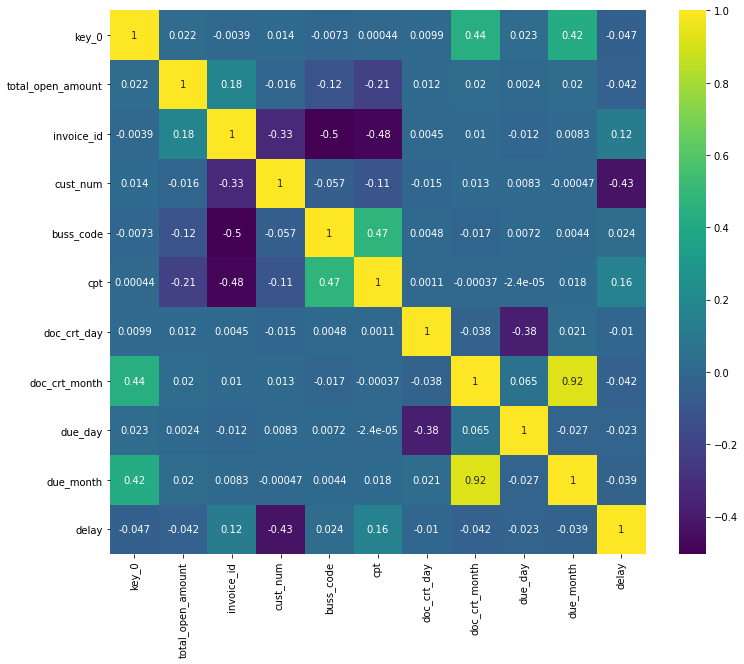

In [91]:
plt.figure(figsize=(12,10))
cor = X_train.merge(Y_train, on=X_train.index).corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month.

In [92]:
X_train = X_train.drop(["due_month"], axis=1).copy()
X_valid = X_valid.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

# **Modelling**

In [93]:
base_model=LinearRegression()
base_model.fit(X_train, Y_train)

LinearRegression()

### **Model Validation**

In [94]:
Y_Pred = base_model.predict(X_valid)

In [95]:
mean_squared_error(Y_valid, Y_Pred, squared=False)

7.965944288184817

In [96]:
# creating a DataFrame to store Predicted and actual data
check = pd.DataFrame(zip(Y_Pred , Y_valid),columns=['PredictedData','ActualData'])
check.head()

,PredictedData,ActualData
0,-0.672216,0.0
1,1.548212,0.0
2,16.963225,36.0
3,0.897701,0.0
4,8.628363,2.0


# **Missing Data Prediction**

In [97]:
predicted = base_model.predict(x_test)

In [98]:
predicted = np.around(predicted)
predicted.astype(int)

array([ 1, -1, -1, ...,  0,  6,  0])

### **Creating a new dataframe**

In [99]:
Col=pd.DataFrame()
Delay=[]
for x in predicted:
    Delay.append(pd.Timedelta(days=x))
delay = pd.Series(Delay,name='delay')

In [100]:
FinalDF = x_test.merge(delay, on=x_test.index )
FinalDF.drop('key_0', axis=1, inplace=True)
FinalDF

,total_open_amount,invoice_id,cust_num,buss_code,cpt,doc_crt_day,doc_crt_month,due_day,delay
0,63313.93,1.930574e+09,200769623.0,1,27,27,2,13,1 days
1,49884.00,1.930579e+09,200763814.0,1,8,27,2,30,-1 days
2,94461.58,1.930576e+09,200761734.0,1,13,27,2,13,-1 days
3,35147.50,1.930569e+09,200759878.0,1,27,27,2,13,2 days
4,24145.01,1.930572e+09,200762301.0,1,18,27,2,13,0 days
...,...,...,...,...,...,...,...,...,...
9680,8064.00,1.930900e+09,100036318.0,1,7,13,5,23,8 days
9681,9291.00,1.930907e+09,200915438.0,1,13,18,5,2,0 days
9682,17544.11,1.930917e+09,200763229.0,1,13,19,5,3,0 days
9683,1373.60,2.960636e+09,140105785.0,0,4,19,5,29,6 days


# **Creating the Aging Bucket**

In [101]:
aging_bucket = []
for x in predicted:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
agingBucket = pd.Series(aging_bucket, name="aging_bucket")

In [102]:
FinalDF = FinalDF.merge(agingBucket, on=FinalDF.index )
FinalDF.drop('key_0', axis=1, inplace=True)
FinalDF

,total_open_amount,invoice_id,cust_num,buss_code,cpt,doc_crt_day,doc_crt_month,due_day,delay,aging_bucket
0,63313.93,1.930574e+09,200769623.0,1,27,27,2,13,1 days,0-15days
1,49884.00,1.930579e+09,200763814.0,1,8,27,2,30,-1 days,0-15days
2,94461.58,1.930576e+09,200761734.0,1,13,27,2,13,-1 days,0-15days
3,35147.50,1.930569e+09,200759878.0,1,27,27,2,13,2 days,0-15days
4,24145.01,1.930572e+09,200762301.0,1,18,27,2,13,0 days,0-15days
...,...,...,...,...,...,...,...,...,...,...
9680,8064.00,1.930900e+09,100036318.0,1,7,13,5,23,8 days,0-15days
9681,9291.00,1.930907e+09,200915438.0,1,13,18,5,2,0 days,0-15days
9682,17544.11,1.930917e+09,200763229.0,1,13,19,5,3,0 days,0-15days
9683,1373.60,2.960636e+09,140105785.0,0,4,19,5,29,6 days,0-15days


In [103]:
FinalDF['aging_bucket'].value_counts()

0-15days     9565
16-30days     120
Name: aging_bucket, dtype: int64

In [104]:
testData['clear_date'] = testData['due_in_date'] + FinalDF['delay']
testData['notes'] = FinalDF['aging_bucket']
testData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,notes
0,U001,0200769623,WAL-MAR in,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,63313.93,2020-02-27,NAH4,1.930574e+09,1,NaN,0-15days
1,U001,0200763814,SYSCO F systems,2020-03-29,2020.0,2020-02-27,2020-03-30,USD,49884.00,2020-02-27,NA32,1.930579e+09,1,NaN,0-15days
2,U001,0200761734,H E BUT in,2020-03-12,2020.0,2020-02-27,2020-03-13,USD,94461.58,2020-02-27,NAA8,1.930576e+09,1,NaN,0-15days
3,U001,0200759878,SA systems,2020-03-15,2020.0,2020-02-27,2020-03-13,USD,35147.50,2020-02-27,NAH4,1.930569e+09,1,NaN,0-15days
4,U001,0200762301,C&S WH foundation,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,24145.01,2020-02-27,NAC6,1.930572e+09,1,NaN,0-15days


In [105]:
testData.to_csv("MainTest.csv")

In [106]:
testData.shape

(9685, 15)